In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Full path to the dataset
file_path = '/content/drive/My Drive/Invoices.csv'

# Setup stage: Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the data types of the DataFrame columns
print(df.dtypes)


Mounted at /content/drive
InvoiceID           int64
InvoiceNumber      object
InvoiceDate        object
InvoiceDueDate     object
InvoiceAmount     float64
PaymentDate        object
CustomerName       object
CustomerGender     object
dtype: object


In [2]:
# 1. Convert Dates from Strings to Datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDueDate'] = pd.to_datetime(df['InvoiceDueDate'])
df['PaymentDate'] = pd.to_datetime(df['PaymentDate'])
# Display the data types of the DataFrame columns
print(df.dtypes)

InvoiceID                  int64
InvoiceNumber             object
InvoiceDate       datetime64[ns]
InvoiceDueDate    datetime64[ns]
InvoiceAmount            float64
PaymentDate       datetime64[ns]
CustomerName              object
CustomerGender            object
dtype: object


In [3]:
# 2. Please check for duplicate invoice numbers in the dataset?
df[df.duplicated(['InvoiceNumber'], keep=False)]

,InvoiceID,InvoiceNumber,InvoiceDate,InvoiceDueDate,InvoiceAmount,PaymentDate,CustomerName,CustomerGender


In [4]:
# 3. Please list the frequency of transactions for each customer?
df['CustomerName'].value_counts()

,count
CustomerName,
Hannah U Powell,10199
Gregory Y Rogers,10032
Douglas P Cox,5168
John C Barnes,5147
Frances S Smith,5128
...,...
Lauren P Carter,4872
Jacqueline G Hughes,4858
Robert R Myers,4845


In [5]:
# 4. Please list payment dates that occur before the invoice date?
df[df['PaymentDate'] < df['InvoiceDate']]

,InvoiceID,InvoiceNumber,InvoiceDate,InvoiceDueDate,InvoiceAmount,PaymentDate,CustomerName,CustomerGender
677,678,N3YZRWX1ZF,2021-06-22,2021-07-22,117.27,2021-06-20,Gregory Y Rogers,M
762,763,TSFS6J9LDF,2016-11-12,2016-12-12,600.34,2016-11-10,Hannah U Powell,F
806,807,WAR7STU3XR,2018-05-18,2018-06-17,546.35,2018-05-16,Gregory Y Rogers,M
826,827,MDZW7W1JCF,2019-06-04,2019-07-04,903.81,2019-06-02,Gregory Y Rogers,M
1526,1527,87PZALO7E8,2021-08-31,2021-09-30,447.09,2021-08-29,Hannah U Powell,F
...,...,...,...,...,...,...,...,...
507957,507958,7MNEK6Y6DZ,2019-08-01,2019-08-31,767.00,2019-07-31,Hannah U Powell,F
507993,507994,DL53C8HG5S,2024-02-20,2024-03-21,326.00,2024-02-19,Hannah U Powell,F
509763,509764,16XNVM1G1N,2015-03-18,2015-04-17,525.78,2015-03-16,Hannah U Powell,F
509838,509839,61B0DBM0GE,2019-03-20,2019-04-19,143.00,2019-03-18,Gregory Y Rogers,M


In [6]:
# 5. Please list rounded invoice amounts, which could be indicative of fraud?
df[df['InvoiceAmount'] % 1 == 0]

,InvoiceID,InvoiceNumber,InvoiceDate,InvoiceDueDate,InvoiceAmount,PaymentDate,CustomerName,CustomerGender
30,31,QOEZKJIJN8,2016-01-09,2016-02-08,231.0,2016-02-06,Gregory Y Rogers,M
37,38,99X9SSCR0X,2018-05-18,2018-06-17,512.0,2018-06-22,Gregory Y Rogers,M
38,39,U0YUW3TTPL,2018-05-19,2018-06-18,512.0,2018-05-22,Gregory Y Rogers,M
60,60,6YR42VDUQM,2015-04-16,2015-05-16,640.0,2015-05-18,Gregory Y Rogers,M
61,62,J4DZYGDEMD,2015-04-16,2015-05-16,640.0,2015-05-18,Gregory Y Rogers,M
...,...,...,...,...,...,...,...,...
509867,499756,534XK7AK36,2016-05-03,2016-06-02,152.0,2016-06-03,Christine F Stewart,F
509910,499798,0UVCC4KWC1,2022-01-13,2022-02-12,646.0,2022-02-14,Sean L Kelly,M
509982,499870,574F9B58V6,2015-08-10,2015-09-09,829.0,2015-09-12,James W Adams,M
510005,499893,1B2W5BKLMB,2019-11-27,2019-12-27,575.0,2019-12-27,Hannah U Powell,F


In [7]:
# 6. Please identify large transactions that are significantly higher than the average?
average_amount = df['InvoiceAmount'].mean()
df[df['InvoiceAmount'] > 1.2 * average_amount]

,InvoiceID,InvoiceNumber,InvoiceDate,InvoiceDueDate,InvoiceAmount,PaymentDate,CustomerName,CustomerGender
2,3,RCKC2ACE7K,2017-01-20,2017-02-19,824.60,2017-02-19,Shirley B Smith,F
7,8,AHX2709F2Y,2015-09-30,2015-10-30,550.88,2015-10-30,Frank Q Wright,M
13,14,CG6XIOZT0I,2017-05-11,2017-06-10,894.02,2017-06-09,Lori P Smith,F
18,19,OMK4UW276M,2022-04-12,2022-05-12,646.69,2022-05-16,Wayne S Cook,M
19,20,5JI9CO5K5A,2015-04-08,2015-05-08,985.44,2015-05-07,Kyle W Sullivan,F
...,...,...,...,...,...,...,...,...
510095,499982,VSV1J5CXBI,2019-04-02,2019-05-02,973.03,2019-05-07,Ryan H Rodriguez,M
510097,499984,F5PRO9BGUN,2017-11-30,2017-12-30,873.95,2018-01-02,Kyle W Sullivan,F
510101,499988,XPME0LK73E,2020-10-01,2020-10-31,790.35,2020-11-05,Betty V Hill,F
510103,499990,GAOVX8D3AB,2024-05-22,2024-06-21,556.73,2024-06-19,Diane P Harris,F


In [8]:
# 7. Find transactions where the payment date is suspiciously close to the invoice date?
from datetime import timedelta
df[df['PaymentDate'] - df['InvoiceDate'] <= timedelta(days=1)]

,InvoiceID,InvoiceNumber,InvoiceDate,InvoiceDueDate,InvoiceAmount,PaymentDate,CustomerName,CustomerGender
677,678,N3YZRWX1ZF,2021-06-22,2021-07-22,117.27,2021-06-20,Gregory Y Rogers,M
762,763,TSFS6J9LDF,2016-11-12,2016-12-12,600.34,2016-11-10,Hannah U Powell,F
806,807,WAR7STU3XR,2018-05-18,2018-06-17,546.35,2018-05-16,Gregory Y Rogers,M
826,827,MDZW7W1JCF,2019-06-04,2019-07-04,903.81,2019-06-02,Gregory Y Rogers,M
1038,1039,ZCY6OJF7JL,2020-10-02,2020-11-01,392.00,2020-10-02,Hannah U Powell,F
...,...,...,...,...,...,...,...,...
509179,509180,B2ULIUCFJV,2017-09-15,2017-10-15,638.00,2017-09-16,Gregory Y Rogers,M
509559,509560,RL266CV1GZ,2020-08-05,2020-09-04,536.67,2020-08-06,Gregory Y Rogers,M
509763,509764,16XNVM1G1N,2015-03-18,2015-04-17,525.78,2015-03-16,Hannah U Powell,F
509838,509839,61B0DBM0GE,2019-03-20,2019-04-19,143.00,2019-03-18,Gregory Y Rogers,M


In [9]:
# 8. Locate anomalies in payment patterns, such as payments always at the edge of the payment term.
df[df['PaymentDate'] - df['InvoiceDueDate'] >= timedelta(days=5)]

,InvoiceID,InvoiceNumber,InvoiceDate,InvoiceDueDate,InvoiceAmount,PaymentDate,CustomerName,CustomerGender
1,2,6E19I9BF3E,2017-04-23,2017-05-23,271.06,2017-05-28,Steven Q Young,M
24,25,2K3KA9BA0Q,2024-03-29,2024-04-28,721.51,2024-05-03,Lisa T King,F
37,38,99X9SSCR0X,2018-05-18,2018-06-17,512.00,2018-06-22,Gregory Y Rogers,M
43,43,WPDI230S6W,2019-01-24,2019-02-23,159.23,2019-02-28,Jacqueline D Walker,F
57,57,E5VJ8YCGGF,2018-06-11,2018-07-11,199.05,2018-07-16,Donna N Bell,F
...,...,...,...,...,...,...,...,...
510049,499936,701L7CW0GK,2021-01-14,2021-02-13,767.59,2021-02-18,Teresa F Rogers,F
510089,499976,MQ94OL7EV5,2017-07-27,2017-08-26,779.54,2017-08-31,Debra R Johnson,F
510095,499982,VSV1J5CXBI,2019-04-02,2019-05-02,973.03,2019-05-07,Ryan H Rodriguez,M
510101,499988,XPME0LK73E,2020-10-01,2020-10-31,790.35,2020-11-05,Betty V Hill,F


In [10]:
#9. Identify outliers in the amounts column.  Employ the Interquartile Range (IQR) method
df['InvoiceAmount'].quantile([0.25, 0.75])

,InvoiceAmount
0.25,185.0400
0.75,578.0175


In [11]:
# 10. Pinpoint the exact fraudulent transactions for person 1.
df[df['CustomerName'] == 'Gregory Y Rogers']

,InvoiceID,InvoiceNumber,InvoiceDate,InvoiceDueDate,InvoiceAmount,PaymentDate,CustomerName,CustomerGender
30,31,QOEZKJIJN8,2016-01-09,2016-02-08,231.00,2016-02-06,Gregory Y Rogers,M
37,38,99X9SSCR0X,2018-05-18,2018-06-17,512.00,2018-06-22,Gregory Y Rogers,M
38,39,U0YUW3TTPL,2018-05-19,2018-06-18,512.00,2018-05-22,Gregory Y Rogers,M
60,60,6YR42VDUQM,2015-04-16,2015-05-16,640.00,2015-05-18,Gregory Y Rogers,M
61,62,J4DZYGDEMD,2015-04-16,2015-05-16,640.00,2015-05-18,Gregory Y Rogers,M
...,...,...,...,...,...,...,...,...
509837,499728,XSYSNPXF0R,2019-03-19,2019-04-18,143.00,2019-04-21,Gregory Y Rogers,M
509838,509839,61B0DBM0GE,2019-03-20,2019-04-19,143.00,2019-03-18,Gregory Y Rogers,M
509906,499795,GZB5S4MOB6,2023-05-29,2023-06-28,725.75,2023-07-03,Gregory Y Rogers,M
509907,509908,CONUQYCL9C,2023-05-29,2023-06-28,725.75,2023-07-03,Gregory Y Rogers,M


In [12]:
# 11. Pinpoint the exact fraudulent transactions for person 1.
df[df['CustomerName'] == 'Gregory Y Rogers']

,InvoiceID,InvoiceNumber,InvoiceDate,InvoiceDueDate,InvoiceAmount,PaymentDate,CustomerName,CustomerGender
30,31,QOEZKJIJN8,2016-01-09,2016-02-08,231.00,2016-02-06,Gregory Y Rogers,M
37,38,99X9SSCR0X,2018-05-18,2018-06-17,512.00,2018-06-22,Gregory Y Rogers,M
38,39,U0YUW3TTPL,2018-05-19,2018-06-18,512.00,2018-05-22,Gregory Y Rogers,M
60,60,6YR42VDUQM,2015-04-16,2015-05-16,640.00,2015-05-18,Gregory Y Rogers,M
61,62,J4DZYGDEMD,2015-04-16,2015-05-16,640.00,2015-05-18,Gregory Y Rogers,M
...,...,...,...,...,...,...,...,...
509837,499728,XSYSNPXF0R,2019-03-19,2019-04-18,143.00,2019-04-21,Gregory Y Rogers,M
509838,509839,61B0DBM0GE,2019-03-20,2019-04-19,143.00,2019-03-18,Gregory Y Rogers,M
509906,499795,GZB5S4MOB6,2023-05-29,2023-06-28,725.75,2023-07-03,Gregory Y Rogers,M
509907,509908,CONUQYCL9C,2023-05-29,2023-06-28,725.75,2023-07-03,Gregory Y Rogers,M


In [13]:
 # 12. Find if person 2 has multiple transactions on the same date?
 # Filter for transactions by Hannah U Powell
filtered_df = df[df['CustomerName'] == 'Hannah U Powell']

# Group by 'InvoiceDate' to find multiple transactions on the same date
grouped = filtered_df.groupby('InvoiceDate').size()

# To identify dates with multiple transactions
multiple_transactions = grouped[grouped > 1]

# Displaying the result
print(multiple_transactions)

InvoiceDate
2014-12-31     2
2015-01-01     5
2015-01-02    10
2015-01-03     5
2015-01-04     5
              ..
2024-06-23     4
2024-06-24     3
2024-06-25     3
2024-06-26     3
2024-06-29     4
Length: 2545, dtype: int64


In [14]:
# 13. Find those instances where the payment date is significantly after the due date. Up to 4 days.
df[df['PaymentDate'] > df['InvoiceDueDate'] + timedelta(days=4)]

,InvoiceID,InvoiceNumber,InvoiceDate,InvoiceDueDate,InvoiceAmount,PaymentDate,CustomerName,CustomerGender
1,2,6E19I9BF3E,2017-04-23,2017-05-23,271.06,2017-05-28,Steven Q Young,M
24,25,2K3KA9BA0Q,2024-03-29,2024-04-28,721.51,2024-05-03,Lisa T King,F
37,38,99X9SSCR0X,2018-05-18,2018-06-17,512.00,2018-06-22,Gregory Y Rogers,M
43,43,WPDI230S6W,2019-01-24,2019-02-23,159.23,2019-02-28,Jacqueline D Walker,F
57,57,E5VJ8YCGGF,2018-06-11,2018-07-11,199.05,2018-07-16,Donna N Bell,F
...,...,...,...,...,...,...,...,...
510049,499936,701L7CW0GK,2021-01-14,2021-02-13,767.59,2021-02-18,Teresa F Rogers,F
510089,499976,MQ94OL7EV5,2017-07-27,2017-08-26,779.54,2017-08-31,Debra R Johnson,F
510095,499982,VSV1J5CXBI,2019-04-02,2019-05-02,973.03,2019-05-07,Ryan H Rodriguez,M
510101,499988,XPME0LK73E,2020-10-01,2020-10-31,790.35,2020-11-05,Betty V Hill,F


In [15]:
# 14. Find if there are any transactions where the invoice amount is a round number for Person 2.
df[(df['CustomerName'] == 'Hannah U Powell') & (df['InvoiceAmount'] % 1 == 0)]

,InvoiceID,InvoiceNumber,InvoiceDate,InvoiceDueDate,InvoiceAmount,PaymentDate,CustomerName,CustomerGender
248,247,SHL6A3OL9I,2017-04-06,2017-05-06,813.0,2017-05-04,Hannah U Powell,F
289,288,C6YUR94BSP,2024-06-22,2024-07-22,882.0,2024-07-23,Hannah U Powell,F
290,291,3XJ5WL1KJZ,2024-06-22,2024-07-22,882.0,2024-07-23,Hannah U Powell,F
291,292,LDMKKV4GF7,2024-06-21,2024-07-21,882.0,2024-06-25,Hannah U Powell,F
424,419,Y9SRWH6GO1,2016-07-01,2016-07-31,426.0,2016-07-30,Hannah U Powell,F
...,...,...,...,...,...,...,...,...
509199,499104,X25LBSKX39,2019-09-02,2019-10-02,272.0,2019-10-06,Hannah U Powell,F
509849,499739,9UHEM71OXV,2023-01-06,2023-02-05,666.0,2023-02-10,Hannah U Powell,F
509850,509851,VHWB5OYE9T,2023-01-05,2023-02-04,666.0,2023-01-04,Hannah U Powell,F
510005,499893,1B2W5BKLMB,2019-11-27,2019-12-27,575.0,2019-12-27,Hannah U Powell,F


In [16]:
# 15. List the total sales per customer for the top 10 customers
# and sort them from largest to smallest
total_sales_per_customer_sorted = df.groupby('CustomerName')['InvoiceAmount'].sum().sort_values(ascending=False).head(10)
print(total_sales_per_customer_sorted)

CustomerName
Hannah U Powell      5637613.97
Gregory Y Rogers     5499615.68
Douglas P Cox        2035055.58
John C Barnes        2034663.93
Amy F White          2031431.34
Jeremy J Gonzalez    2026088.64
Arthur D Jenkins     2025095.08
Frances S Smith      2022669.68
Janet V Taylor       2021443.52
Kyle W Sullivan      2020348.49
Name: InvoiceAmount, dtype: float64


In [17]:
# 16. Please list the average invoice amount for each gender.
# Calculate the average Invoice Amount for each gender
average_invoice_amount_by_gender = df.groupby('CustomerGender')['InvoiceAmount'].mean()

# Display the average Invoice Amount for each gender
print(average_invoice_amount_by_gender)

CustomerGender
F    399.296517
M    404.277421
Name: InvoiceAmount, dtype: float64


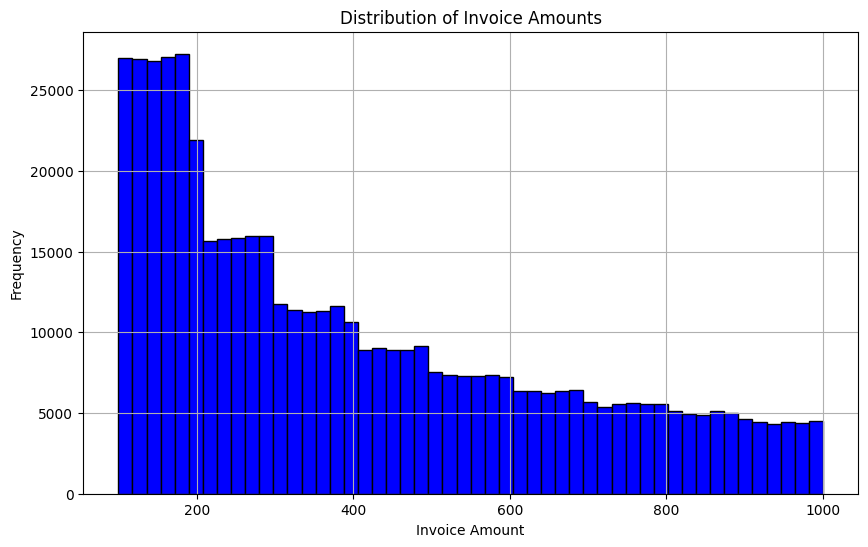

In [18]:
# 17. What is the distribution of invoice amounts?

# For this question, you can visualize the distribution of invoice amounts using a histogram.
# This visualization will help you understand the spread of transaction sizes and identify any common amounts or outliers.

import matplotlib.pyplot as plt

# Histogram of invoice amounts
plt.figure(figsize=(10, 6))
plt.hist(df['InvoiceAmount'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Invoice Amounts')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

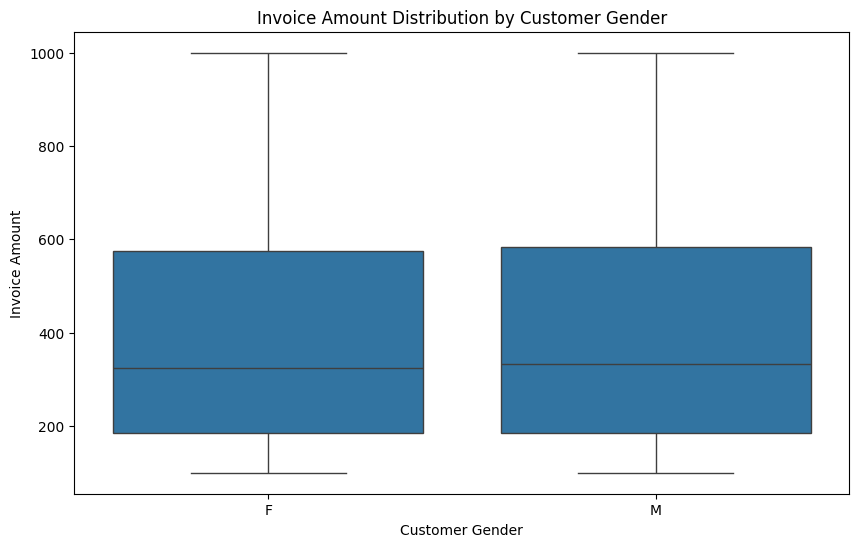

In [19]:
# 18. How does the invoice amount vary by customer gender?
# You can create a box plot to compare the distribution of invoice amounts by customer gender.
# This will provide insights into whether there are differences in the amounts invoiced to different genders.

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='CustomerGender', y='InvoiceAmount', data=df)
plt.title('Invoice Amount Distribution by Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Invoice Amount')
plt.show()

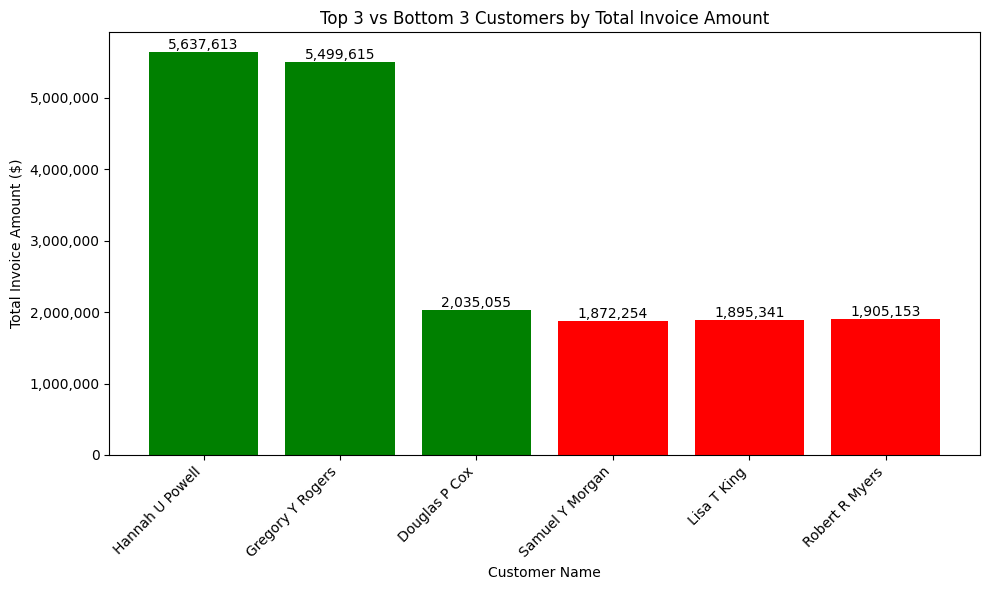

In [20]:
# 19. create a visualization that compares the top 3 customers by total invoice amount to the bottom 3 customers.

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# 1. Aggregate invoice amounts by customer
total_by_customer = df.groupby('CustomerName')['InvoiceAmount'].sum().sort_values()

# 2. Identify top and bottom customers
top_customers = total_by_customer.nlargest(3)
bottom_customers = total_by_customer.nsmallest(3)

# 3. Combine data for visualization
combined_data = pd.concat([top_customers, bottom_customers])

# 4. Create the visualization
plt.figure(figsize=(10, 6))
# Assign colors for top and bottom customers for visual distinction
colors = ['green' if name in top_customers else 'red' for name in combined_data.index]
bars = plt.bar(combined_data.index, combined_data.values, color=colors)

# Format the y-axis to show labels in a more readable format
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Add a title and labels
plt.title('Top 3 vs Bottom 3 Customers by Total Invoice Amount')
plt.xlabel('Customer Name')
plt.ylabel('Total Invoice Amount ($)')
plt.xticks(rotation=45, ha="right")

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval):,}', ha='center', va='bottom')

# Show plot with a tight layout
plt.tight_layout()
plt.show()

In [21]:
# 20. Analyze Yearly Sales Trends
df['InvoiceYear'] = df['InvoiceDate'].dt.year
yearly_sales = df.groupby('InvoiceYear')['InvoiceAmount'].sum()
print(f"Yearly Sales Trends:\n{yearly_sales}")

Yearly Sales Trends:
InvoiceYear
2014         779.65
2015    21444446.13
2016    21641173.91
2017    21360169.55
2018    21747673.67
2019    21531704.10
2020    21543691.93
2021    21610034.85
2022    21527393.90
2023    21350365.27
2024    10726115.90
Name: InvoiceAmount, dtype: float64


In [22]:
pip install nbconvert

In [23]:
import os
# Define the paths
folder_name = ''
notebook_path = '/content/drive/My Drive/' + folder_name + '/'
notebook_name = 'Invoice_Basic_Tasks.ipynb'
html_file_name = 'Invoice_Basic_Tasks.html'
html_file_path = os.path.join(notebook_path, html_file_name)


# Ensure the notebook exists
if os.path.exists(notebook_path + notebook_name):
    # Convert the notebook to HTML
    !jupyter nbconvert --to html "{notebook_path + notebook_name}" --output-dir "{notebook_path}" --output "{html_file_name}"

    if os.path.exists(html_file_path):
        print(f'Notebook saved as HTML file at {html_file_path}')
    else:
        print(f'HTML file not found at {html_file_path}.')
else:
    print(f'Notebook file not found at {notebook_path + notebook_name}.')

[NbConvertApp] Converting notebook /content/drive/My Drive//Invoice_Basic_Tasks.ipynb to html
[NbConvertApp] Writing 308896 bytes to /content/drive/My Drive/Invoice_Basic_Tasks.html
Notebook saved as HTML file at /content/drive/My Drive//Invoice_Basic_Tasks.html


# New Section